What 's new ?

* notion of teacher
* teacher oriented approach for reducing space and having a more teacher oriented-solution

In [1]:
import numpy as np

In [5]:
timetable_constraints = {
  "nbr_of_days": 5,
  "nbr_of_periods_per_day": 4,
  "classes_data": {
    "groups": ["A", "B", "C"],
    "teachers": [
       {
          "name": "math_teacher",
          "subjects_groups_period": {
            "math": {
              "A": 4,
              "B": 4,
              "C": 4,
            },
            "english": {
              "A": 0,
              "B": 0,
              "C": 0,
            },
            "science": {
              "A": 0,
              "B": 0,
              "C": 0,
            },
          }
        },
        {
          "name": "english_teacher",
          "subjects_groups_period": {
            "math": {
              "A": 0,
              "B": 0,
              "C": 0,
            },
            "english": {
              "A": 4,
              "B": 4,
              "C": 4,
            },
            "science": {
              "A": 0,
              "B": 0,
              "C": 0,
            },
          }
        },
        {
          "name": "science_teacher",
          "subjects_groups_period": {
            "math": {
              "A": 0,
              "B": 0,
              "C": 0,
            },
            "english": {
              "A": 0,
              "B": 0,
              "C": 0,
            },
            "science": {
              "A": 2,
              "B": 2,
              "C": 2,
            },
          }
        },

    ],
    "subjects": ["math", "english", "science"],
  }
}

timetable_constraints["nbr_of_teachers"] = len(timetable_constraints["classes_data"]["teachers"])
timetable_constraints["nbr_of_subjects"] = len(timetable_constraints["classes_data"]["subjects"])

# give each teacher the number of periods he/she can teach
for teacher in timetable_constraints["classes_data"]["teachers"]:
  teacher["nbr_of_periods"] = 0
  for subject in teacher["subjects_groups_period"]:
    for group in teacher["subjects_groups_period"][subject]:
      teacher["nbr_of_periods"] += teacher["subjects_groups_period"][subject][group]

# slots by teacher
timetable_constraints["slots"] = 0
for teacher in timetable_constraints["classes_data"]["teachers"]:
  timetable_constraints["slots"] += teacher["nbr_of_periods"]

# slots by timetable
timetable_constraints["time_slots"] = timetable_constraints["nbr_of_days"] * timetable_constraints["nbr_of_periods_per_day"]

timetable_constraints["teachers_slots_array"] = []
for teacher in timetable_constraints["classes_data"]["teachers"]:
  timetable_constraints["teachers_slots_array"].append(teacher["nbr_of_periods"])

timetable_constraints

{'nbr_of_days': 5,
 'nbr_of_periods_per_day': 4,
 'classes_data': {'groups': ['A', 'B', 'C'],
  'teachers': [{'name': 'math_teacher',
    'subjects_groups_period': {'math': {'A': 4, 'B': 4, 'C': 4},
     'english': {'A': 0, 'B': 0, 'C': 0},
     'science': {'A': 0, 'B': 0, 'C': 0}},
    'nbr_of_periods': 12},
   {'name': 'english_teacher',
    'subjects_groups_period': {'math': {'A': 0, 'B': 0, 'C': 0},
     'english': {'A': 4, 'B': 4, 'C': 4},
     'science': {'A': 0, 'B': 0, 'C': 0}},
    'nbr_of_periods': 12},
   {'name': 'science_teacher',
    'subjects_groups_period': {'math': {'A': 0, 'B': 0, 'C': 0},
     'english': {'A': 0, 'B': 0, 'C': 0},
     'science': {'A': 2, 'B': 2, 'C': 2}},
    'nbr_of_periods': 6}],
  'subjects': ['math', 'english', 'science']},
 'nbr_of_teachers': 3,
 'nbr_of_subjects': 3,
 'slots': 30,
 'time_slots': 20,
 'teachers_slots_array': [12, 12, 6]}

In [3]:
class Timetable:
  def __init__(self, npArray, constraints):
    self.constraints = constraints
    # timetable as a 3d array ( group, day, period) => subject from npArray
    self.timetable = npArray.reshape(
      (constraints["nbr_of_groups"], constraints["nbr_of_days"], constraints["nbr_of_periods_per_day"])
    )
    pass

  def toNpArray(self):
    return self.timetable.flatten()

  def isValid(self):
    pass

  def fitness(self):
    pass

  def plot(self):
    pass

  def print(self):
    pass

In [4]:
import pygad

In [5]:
def fitness_func(ga_instance, solution, solution_idx):
    timeTable = Timetable(solution, timetable_constraints)
    fitness = timeTable.fitness()
    return fitness

In [6]:
fitness_function = fitness_func

num_generations = 2000
num_parents_mating = 50

sol_per_pop = 200
gene_space = [ 
              { 
                "low" : -1, 
                "high": timetable_constraints["nbr_of_subjects"],
                "step": 1
              } 
              for _ in range(timetable_constraints["nbr_of_groups"] * timetable_constraints["nbr_of_days"] * timetable_constraints["nbr_of_periods_per_day"])
             ]
num_genes = timetable_constraints["nbr_of_days"] * timetable_constraints["nbr_of_periods_per_day"] * timetable_constraints["nbr_of_groups"]
gene_type = [int for _ in range(num_genes)]

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

Fitness=0.9200	: 100%|████████████████████| 2000/2000 [07:32<00:00,  4.42it/s]


Fitness of the best solution : 0.9200000000001001


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


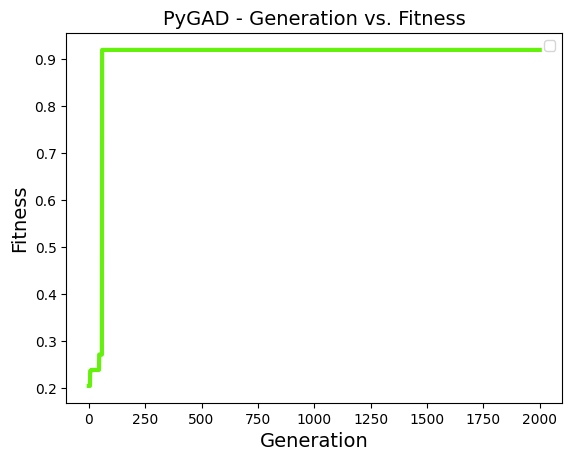

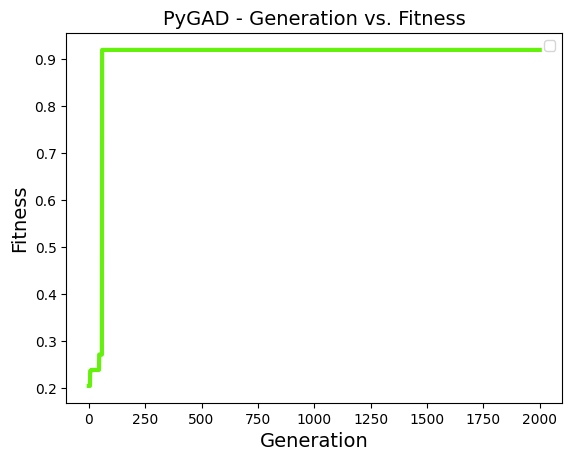

In [7]:
from tqdm import tqdm
progress_bar = tqdm(total=num_generations, bar_format='{l_bar}{bar:20}{r_bar}{bar:-10b}')

def on_gen(ga_instance):
    progress_bar.update(1)
    progress_bar.set_description_str("Fitness={fitness:.4f}\t".format(fitness=ga_instance.best_solution()[1]))
    # print("Fitness of the best solution :", ga_instance.best_solution()[1])

def on_stop(ga_instance, last_generation_fitness):
    progress_bar.close()
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

ga_instance = pygad.GA(num_generations=num_generations,
                       on_generation=on_gen,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                      #  mutation_probability=[0.5, 0.1],
                       gene_type=gene_type,
                       num_genes=num_genes,
                       on_stop=on_stop
                      )

ga_instance.run()
ga_instance.plot_fitness()

In [8]:
progress_bar.close()

In [9]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [2 0 1 -1 2 0 2 1 -1 0 1 2 -1 0 1 2 1 1 -1 2 0 -1 0 1 2 2 2 2 -1 0 -1 1 1
 2 1 -1 0 2 1 1 2 -1 1 2 1 0 0 2 1 -1 0 2 1 1 -1 2 0 -1 1 2]
Fitness value of the best solution = 0.9200000000001001


In [10]:
timetable = Timetable(solution, timetable_constraints)

In [11]:
table = timetable.timetable
table = [[["-" if period == -1 else timetable_constraints["subject_names"][period] for period in day] for day in group] for group in table]

import pandas as pd
table_pd = pd.DataFrame(table[2])
# add day and period columns
table_pd.insert(0, "Day", ["Day "+str(i) for i in range(1, timetable_constraints["nbr_of_days"]+1)])
#rotate the table
table_pd = table_pd.transpose()
table_pd

,0,1,2,3,4
Day,Day 1,Day 2,Day 3,Day 4,Day 5
0,Anglais,Français,Français,Français,Maths
1,-,Maths,-,Français,-
2,Français,Maths,Maths,-,Français
3,Anglais,Anglais,Anglais,Anglais,Anglais
